In [129]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

import pandas as pd

import seaborn as sns

In [130]:
df=pd.read_csv(r'C:\Users\Я\Desktop\читы жизнь\Study\Programming\0_Jupyter\students.csv')[['Growth','Weight','Sex']]
df_test=pd.read_csv(r'C:\Users\Я\Desktop\читы жизнь\Study\Programming\0_Jupyter\students_test.csv')[['Growth','Weight','Sex']]

In [135]:
df=df.dropna()
df_test=df_test.dropna()

<AxesSubplot: xlabel='Weight', ylabel='Growth'>

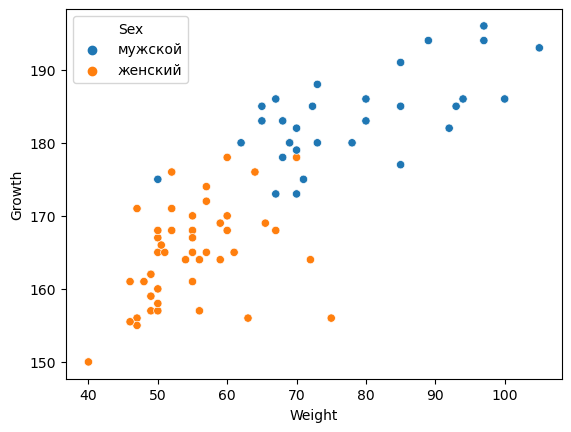

In [136]:
sns.scatterplot(data=df_test,x='Weight',y='Growth',hue='Sex')

In [151]:
scaler = StandardScaler()
scaler.fit(df_test[['Weight','Growth']].values.reshape(-1,2))
arr_test = scaler.transform(df_test[['Weight','Growth']].values.reshape(-1,2))
arr_test

array([[ 0.92974533,  0.70220607],
       [-0.93545513, -0.47224385],
       [ 0.39683091,  0.52152147],
       [-1.13529803, -1.46600916],
       [ 1.99557417,  1.24425988],
       [-1.60159815, -2.00806297],
       [ 1.06297394,  0.97323297],
       [-0.53576932, -1.37566686],
       [-1.13529803, -1.55635146],
       [ 0.39683091,  0.06980996],
       [ 0.0637594 ,  0.97323297],
       [ 1.39604545,  0.43117917],
       [-0.26931211,  0.52152147],
       [-0.80222652,  0.34083686],
       [ 0.26360231,  0.52152147],
       [-1.00206943, -1.19498226],
       [-0.93545513, -0.65292845],
       [-0.46915501, -0.65292845],
       [ 0.39683091,  0.88289067],
       [-0.1360835 ,  0.70220607],
       [ 2.19541707,  1.96699829],
       [-1.06868373, -1.01429766],
       [ 0.55004381,  1.15391758],
       [ 1.92895986,  1.15391758],
       [ 2.72833149,  1.87665599],
       [ 0.19698801,  1.24425988],
       [-0.60238362, -0.38190155],
       [ 0.53005952, -0.74327075],
       [-0.0028549 ,

In [209]:
model=KNeighborsClassifier(n_neighbors=1)
model.fit(arr_test,df_test['Sex'].values)

KNeighborsClassifier(n_neighbors=1)

In [210]:
#scaler.fit(df_test[['Weight','Growth']].values.reshape(-1,2))
arr=scaler.transform(df[['Weight','Growth']].values.reshape(-1,2))
arr

array([[-2.85489866e-03, -2.01216944e-01],
       [ 5.96673820e-01,  1.69597138e+00],
       [-2.69312107e-01, -2.05323412e-02],
       [-3.35926409e-01, -3.81901546e-01],
       [-4.69155014e-01, -1.19498226e+00],
       [-9.35455128e-01,  4.31179165e-01],
       [-6.02383618e-01,  7.02206069e-01],
       [ 3.72754602e+00,  7.02206069e-01],
       [ 3.30216612e-01,  1.15391758e+00],
       [-4.02540711e-01, -3.81901546e-01],
       [-1.13529803e+00, -1.28532456e+00],
       [ 2.26203137e+00,  9.73232973e-01],
       [-1.06868373e+00, -5.62586149e-01],
       [-2.85489866e-03,  1.15391758e+00],
       [-2.69312107e-01,  9.73232973e-01],
       [-7.35612222e-01, -4.72243848e-01],
       [-3.35926409e-01, -7.43270752e-01],
       [ 1.92895986e+00,  1.24425988e+00],
       [-6.02383618e-01, -3.81901546e-01],
       [-5.35769316e-01, -1.28532456e+00],
       [ 6.37594035e-02,  1.42494448e+00],
       [ 6.37594035e-02,  4.31179165e-01],
       [ 3.96830914e-01, -7.43270752e-01],
       [-2.

In [211]:
df['Predicted']=model.predict(arr)
df.head(20)
#model.predict([[183,76]])

,Growth,Weight,Sex,Predicted,Code
0,170,64.0,женский,женский,0
1,191,73.0,мужской,мужской,0
2,172,60.0,мужской,женский,1
3,168,59.0,женский,женский,0
4,159,57.0,женский,женский,0
5,177,50.0,мужской,женский,1
6,180,55.0,мужской,женский,1
7,180,120.0,мужской,мужской,0
8,185,69.0,мужской,мужской,0
9,168,58.0,женский,женский,0


In [212]:
pd.crosstab(df['Predicted'],df['Sex'])

Sex,женский,мужской
Predicted,,
женский,85,25
мужской,10,37


<AxesSubplot: xlabel='Weight', ylabel='Growth'>

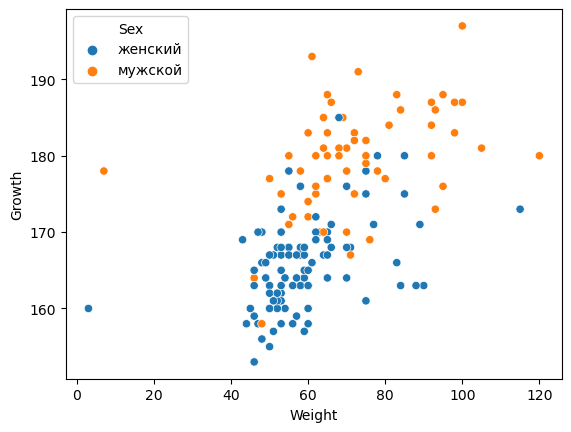

In [213]:
sns.scatterplot(data=df,x='Weight',y='Growth',hue='Sex')

<AxesSubplot: xlabel='Weight', ylabel='Growth'>

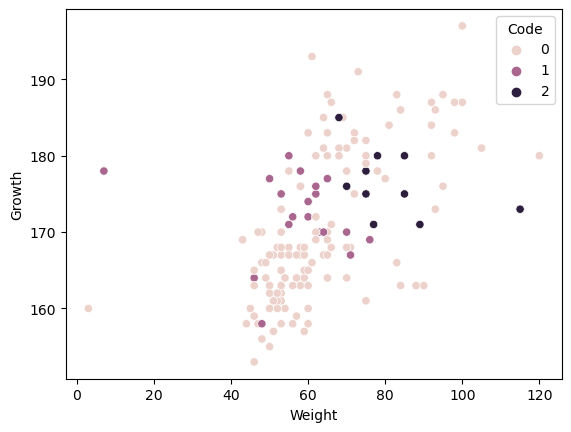

In [168]:
df['Code']=0
df.loc[(df['Sex']=='мужской')&(df['Predicted']=='женский'),'Code']=1
df.loc[(df['Sex']=='женский')&(df['Predicted']=='мужской'),'Code']=2
sns.scatterplot(data=df,x='Weight',y='Growth',hue='Code')

In [169]:
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

Будем по признакам 'Hair length','Shoe size' предсказывать признак 'Sex'. Загрузите эти признаки из таблицы students.csv

Пронормируйте признаки 'Hair length','Shoe size' используя StandardScaler

Запустите модель KNeighborsClassifier(n_neighbors=3), и получите предсказания для студентов из тестовой выборки students_test.csv

С помощью команды pd.crosstab постройте матрицу ошибок (таблицу сопряженности) предсказанного и истинного пола студентов.

В отчет запишите количество студентов женского пола, которые были детектированы как женщины

In [222]:
df=pd.read_csv(r'C:\Users\Я\Desktop\читы жизнь\Study\Programming\0_Jupyter\students.csv')[['Hair length','Shoe size','Sex']]
df_test=pd.read_csv(r'C:\Users\Я\Desktop\читы жизнь\Study\Programming\0_Jupyter\students_test.csv')[['Hair length','Shoe size','Sex']]
model = KNeighborsClassifier(n_neighbors=3)
scaler = StandardScaler()
scaler.fit(df[['Hair length','Shoe size']].values.reshape(-1,2))
arr = scaler.transform(df[['Hair length','Shoe size']].values.reshape(-1,2))
arr_test=scaler.transform(df_test[['Hair length','Shoe size']].values.reshape(-1,2))

In [224]:
model.fit(arr,df['Sex'])
df_test['Predicted']=model.predict(arr_test)

In [227]:
pd.crosstab(df_test['Sex'],df_test['Predicted'])

Predicted,женский,мужской
Sex,,
женский,61,1
мужской,1,35


<AxesSubplot: xlabel='Hair length', ylabel='Shoe size'>

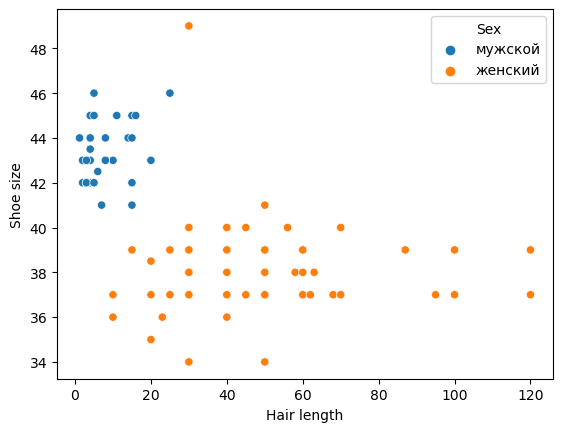

In [231]:
sns.scatterplot(data=df_test,x='Hair length',y='Shoe size',hue='Sex')

<AxesSubplot: xlabel='Hair length', ylabel='Shoe size'>

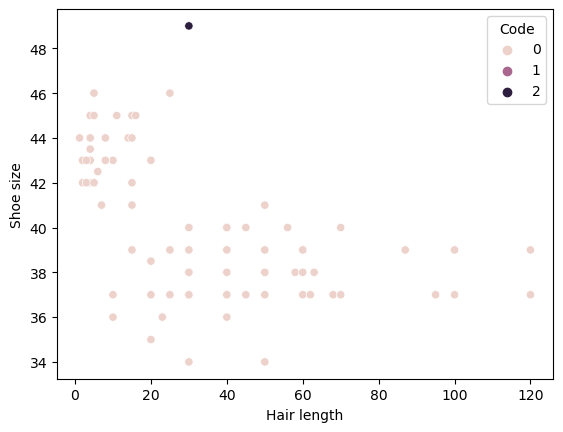

In [229]:
df_test['Code']=0
df_test.loc[(df_test['Sex']=='мужской')&(df_test['Predicted']=='женский'),'Code']=1
df_test.loc[(df_test['Sex']=='женский')&(df_test['Predicted']=='мужской'),'Code']=2
sns.scatterplot(data=df_test,x='Hair length',y='Shoe size',hue='Code')

In [232]:
a = 3
a

3

In [233]:
b = 3
a+b

6